Support Vector Machine - SVM
--
NGUYEN Binh Minh

# <span style="color:#00B8DE"> 1. Introduction</span>

Firstly, let's generate a toy dataset to demonstrate to context of using Support Vector Machine (SVM)

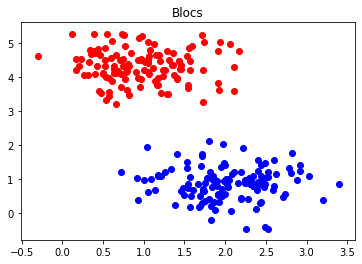

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 250, centers=2, random_state=0, cluster_std=0.50)
x1 = X[y==1,:] 
x2 = X[y==0,:]
%matplotlib inline
plt.figure
plt.title('Blocs')
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red')

We have two different groups which are labeled by 0 (blue) and 1 (red). In SVM, for convenience, we change them into -1 and 1. The aim of SVM is to create a <b> hyperplane </b> that separates two groups (in this case it is a line). The hyperplane has the formula:

\begin{align}
<w,X> + b & = 0
\end{align}

Where w is the coefficient vector, X is assemble of data points and b is a bias. We also define the labels of classes: y = 1 for the blue points and y = -1 for the red points. 

However, it exists many possible hyperplanes that can separate the dataset. Therefore an important thing is how can we choose the most optimal one.

The answer is that we need to find a hyperplane which maximizes the distance to its nearest data points for each class (we call these points "Support Vector"). The distance to the nearest data points for each class is called margin, and it has the fomula:


$$\Delta = \frac{2}{\left\lVert w\right\rVert}$$

We can easily come to this result by projecting the points in support vectors to the hyperplane combining with the result: on the support vectors, we have: \begin{align} <w,X> + b & =1 \end{align} or \begin{align} <w,X> + b & = -1 \end{align} depend on the class.

Therfore the hyperplane is taken: 

$$
          \begin{aligned}
              \text{minimize}_{{w}, b}\,\frac{1}{2} \|{w}\|^2\\
              \text{s.t. } \forall_{i=1}^m y_i \cdot {(\langle {w}, \mathbf{x}_i\rangle + b)} \geq 1
          \end{aligned}$$

where m is the number of support vectors, $y_i$ and $x_i$ is the class values (-1 or 1) and a support vector. To explain the constaint, we need to take to account that SVM classification works like this: 
 $$ \begin{align} <w,X> + b & \geq 1 \text{ then } y = 1\end{align} $$
 $$ \begin{align} <w,X> + b & \leq -1 \text{ then } y = -1\end{align} $$

The thresholds are 1 and -1 because for they are the values of the support vectors when we replace their values into the function of hyperplane. If $ \begin{align} -1 \leq <w,X> + b & \leq 1 \text{ then } y = 1\end{align} $ then the data point is in the margin region.

Combine these two conditions then we have the linear constraint for hyperplane.

# <span style="color:#00B8DE"> 2. Dual Problem</span>

The primal problem to find the weight vector $w$ and the bias $b$. The dual problem is to express the weight $w$ as a linear combination of training data $X$ $${w} = \sum_{m=1}^M \lambda_m\mathbf{y}_m\mathbf{x}_m$$

To acheive that expression, we need to use the optimization with Lagrange multipliers $\lambda_m$, which are weights for the feature vectors. Almost all $\lambda_m$ are zero, except for the $\lambda_i$ in support vectors. We have the optimization problem:
$$\text{minimize}_{\lambda} L = \frac{1}{2} \sum\limits_{m' =1}^M \sum\limits_{m =1}^M \lambda_{m'}\lambda_{n} y_{m'} y_{m}x_{m'}^\top x_{m}  - \sum_{m=1}^M \lambda_m $$

such that: $\lambda^\top y = 0$ and $\lambda_m\geq 0$ for every $m. $

Then : $w^* = \sum_{m = 1}^M \lambda_m y_m x_m$ and  $b^* = y_k -  \sum_{m = 1}^M \lambda_m y_m x_m x_k$ for any $k$ such that $\lambda_k >0$.

Where M is the number of points in training dataset.

To solve this optimization problem, we use cvxopt toolbox. This toolbox is suitable for solving quadratic optimization problems with linear constraints.

In [2]:
import cvxopt
from cvxopt import matrix

In [3]:
# We define q G H Ai to find lambda using a quadratic solver then we calculate the vector w and the parmeter b
def SVM(X, y):
    # to fill
    P = cvxopt.matrix(np.zeros((X.shape [0], X.shape [0])))
    for i in range (X.shape [0]):
        for j in range (X.shape [0]) :
            P [i,j] = y[i]*np.dot (np.transpose (X[i,:]),X[j,:])*y[j]
            
    q = cvxopt.matrix (np.ones (X.shape [0]))
    G = cvxopt.matrix(-1*np.identity (X.shape [0]))
    h = cvxopt.matrix(np.zeros (X.shape [0]))
    A = cvxopt.matrix(np.transpose(cvxopt.matrix((y))))
    i = cvxopt.matrix(np.zeros((1, 1)))
    lambd = cvxopt.solvers.qp(P, -1*q, G, h,A,i)
    lambd = np.asarray (lambd['x'])
    lambd = lambd.reshape((M,)) 
    ind = np.argwhere (lambd > 0.00001) #We consider lambda <= 0.00001 is equal to 0, thus that vector is not support vector.
    lamb = lambd [ind [:,0]]
    X_sv = X[ind [:,0],:]
    y_sv = y[ind [:,0]]
    w = np.dot (lambd*y,X)
    b = y_sv - np.dot(w,np.transpose(X_sv))
   
    return w, np.mean (b), lamb, X_sv, y_sv

The return of this fucntion are the weight vector $w$, bias $b$, the values of $\lambda$ that are non-zero and the support vectors in training dataset.

We also need to define a predict function and hyperplane function for testing and visualizing.

In [4]:
def predict(X, w, b):
    return np.sign(np.dot(X,w)+b) # we use the decision function and the predicted rule to predict the labels. 
# the decision function has the form of f(X) = X.w + b

def f_sv(x, w, b):
    return -(w[0]*x+b)/w[1]
# To plot the decision boundary in 2D plane, we need to define the function f(X) = 0. 
# In 2D plane, the function is: w[0].x + w[1].y + b = 0. And we take the value y out: y = -(w[0]*x+b)/w[1]  
# (with X_i = [x,y] and X = [X_1,X_2,...,X_i,...]^T)

In [5]:
# We change the label to 1 and -1
y[y==0] = -1
tmp = np.ones(len(X))
y = tmp * y

Now we split the dataset into train and test sets and we use SVM function to calculate the parameters.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
M,N = x_train.shape
w, b, lambd, X_sv, y_sv = SVM(x_train,y_train) 

     pcost       dcost       gap    pres   dres
 0: -1.4022e+01 -2.4809e+01  6e+02  2e+01  2e+00
 1: -1.4854e+01 -4.9949e+00  8e+01  3e+00  3e-01
 2: -6.5946e+00 -2.2916e+00  4e+01  2e+00  1e-01
 3: -1.4763e+00 -1.5756e+00  2e+00  7e-02  5e-03
 4: -1.1815e+00 -1.4824e+00  3e-01  5e-16  2e-15
 5: -1.4598e+00 -1.4677e+00  8e-03  7e-17  2e-15
 6: -1.4667e+00 -1.4669e+00  2e-04  6e-17  2e-15
 7: -1.4669e+00 -1.4669e+00  1e-05  2e-16  2e-15
 8: -1.4669e+00 -1.4669e+00  5e-07  2e-16  2e-15
Optimal solution found.


With the parameters obtained, we now test and visualize the datasets. 

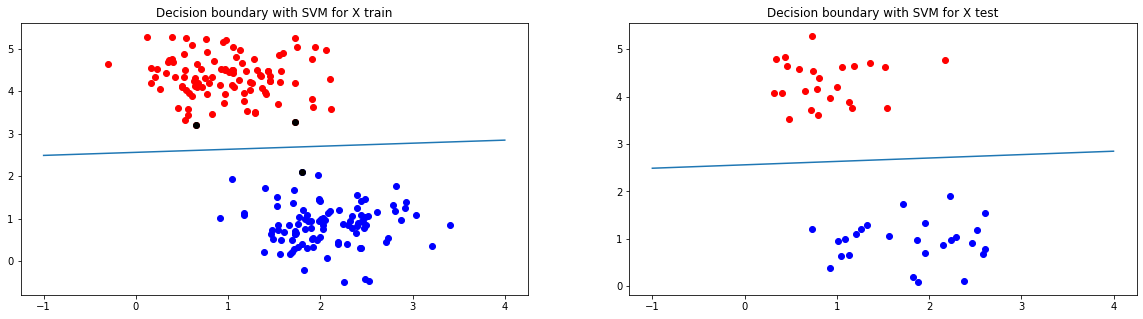

In [7]:
x1_train = x_train[y_train==1,:] 
x2_train = x_train[y_train==-1,:]

# We define the start point and the end point of the hyperplane to plot it.
boundary_line0=f_sv(-1, w, b)
boundary_line1=f_sv(4, w, b)
#Test the parameters
y_test_predict = predict (x_test,w,b) # we test our model to verify whether it works well or not
x1_test = x_test[y_test_predict==1,:] 
x2_test = x_test[y_test_predict==-1,:]
#Plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Decision boundary with SVM for X train')
plt.scatter(x1_train[:,0],x1_train[:,1],color='blue')
plt.scatter(x2_train[:,0],x2_train[:,1],color='red')
plt.scatter(X_sv[:,0],X_sv[:,1],color='black')
plt.plot([-1,4],[boundary_line0,boundary_line1])

plt.subplot(1,2,2)
plt.title('Decision boundary with SVM for X test')
plt.scatter(x1_test[:,0],x1_test[:,1],color='blue')
plt.scatter(x2_test[:,0],x2_test[:,1],color='red')
plt.plot([-1,4],[boundary_line0,boundary_line1])

The light blue line is the hyperplane that we are searching for. The black points in x_train are the support vectors. Because this is a simple dataset so the training and testing accuracy is 100%.

### SVM with sklearn library

In sklearn library, we can define a SVM model to classify data and visualize them.

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 1.00 out of 1
Accuracy of our SVM model on the test data is 1.00 out of 1


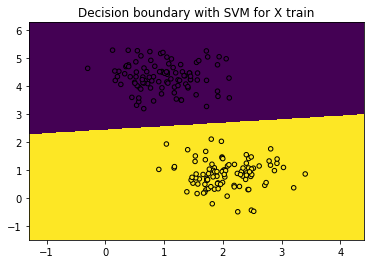

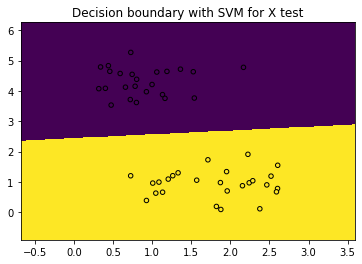

In [9]:
from matplotlib.colors import ListedColormap

def plot_boundaries(classifier,X,Y,title,h=0.01,):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = clf.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(clf,x_train,y_train,'Decision boundary with SVM for X train')
plot_boundaries(clf,x_test,y_test,'Decision boundary with SVM for X test')

We got the same result like our codes above with all the accuracies are 100 %. For some parts in next sections, I will use the sklearn library to define the SVM models instead of creating them manually.

# <span style="color:#00B8DE"> 3. Slack variables</span>

In some situations, the noise makes data not separable. Thus we introduce "Slack variables" to relax the requirement of linear separability, make it easier to solve this problem. The trade-off between accepting some errors and a more complex model is indicated by a parameter $ $C$  \in R^+_0 $. 

We come to the new optimization problem:
    $$
          \begin{aligned}
              \text{minimize}_{\mathbf{w}, b}\,\frac{1}{2} \|\mathbf{w}\|^2 + C \cdot \sum_{i=1}^m \xi_i\\
              \text{s.t. } \forall_{i=1}^m y_i \cdot (\langle \mathbf{w}, \mathbf{x}_i\rangle + b) \geq 1 - \xi_i
          \end{aligned}$$

If $ 0 \leq \xi_i \leq 1 $, the data point is within the margin. If $ \xi_i \geq 1 $, that data point is misclassified.

We will evaluate the influence of parameter C in section 6.

# <span style="color:#00B8DE"> 4. Non-Linear separable data</span>

Let's take a look in an example of a circle dataset

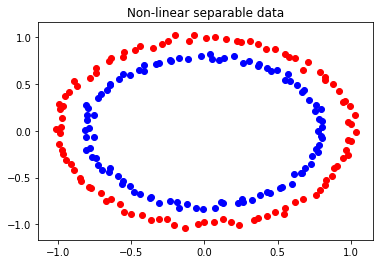

In [10]:
from sklearn.datasets import make_circles
# Create a non-linear separable data
X, y = make_circles(n_samples=200, noise=0.02)

# Regenerate label y in "-1" and "1"
y[y==0] = -1
tmp = np.ones(len(X))
y = tmp * y

# For label "-1" and "1", find the corresponding elements in X 
x1 = X[y==1,:] 
x2 = X[y==-1,:]

# Figure the Non-linear separable data
plt.title('Non-linear separable data')
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red')

We can see that this dataset is not linear separable, therefore we need another classification technique to classify the two groups. 

One of the techniques to solve this problem is to transfer the data into higher dimension, where data can be linear separable.
We have the definition:
$$ \Phi: R^n \to R^N $$  $$ X \to Z = \Phi(X) $$
where $ \Phi $ is the transformation function.

In this example, the transformation function $ \Phi $ is: $ \Phi = (X(0),X(1),X(0)^2 + X(1)^2)$.

In [11]:
Z = np.zeros ((X.shape[0],3))
for i in range (X.shape[0]):
    Z[i,0] = X[i,0]
    Z[i,1] = X[i,1]
    Z[i,2] = X[i,1]*X[i,1]+X[i,0]*X[i,0]

Now we project the new dataset from three dimension to a two dimension plane, but it is not the initial plane when we generate the data. This new plane will help us visualize clearly how the data is separable linearly.

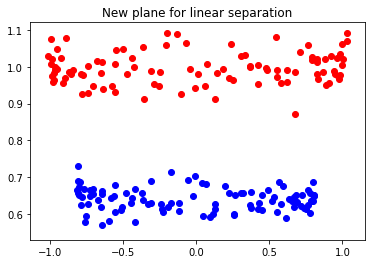

In [12]:
z1 = Z[y==1,:] 
z2 = Z[y==-1,:]
plt.figure
plt.title('New plane for linear separation')
plt.scatter(z1[:,0],z1[:,2],color='blue')
plt.scatter(z2[:,0],z2[:,2],color='red') 

In this plane, we can see that the data now is linear separable. Therefore we can apply the SVM function which was builts in the second part to do a classification.

In [13]:
# Define the decision function for Non-linear separable data
def f_sv_nonlinear(x, w, b):
    return  -(w[0]*x+b)/w[2]

# Here we need to project the 3D data to a 2D plane where the data is linearly separable. 
# We have the function of hyper plane: Z*w + b = 0. With a 3D vector, w[0].Z[0]+w[1].Z[1]+w[2].Z[2] + b = 0.
# When we project on a 2D plane. One of the value Z[0] or Z[1] is eliminated (here we eliminate Z[1]).
# Therefore the function tends to be: w[0].Z[0]+w[2].Z[2] + b = 0. Thus Z[2] = -(w[0]*x+b)/w[2]

     pcost       dcost       gap    pres   dres
 0: -1.9932e+01 -5.7450e+01  3e+02  1e+01  2e+00
 1: -1.5131e+01 -5.3827e+01  5e+01  1e+00  1e-01
 2: -2.7304e+01 -6.0372e+01  4e+01  7e-01  8e-02
 3: -3.3547e+01 -5.7332e+01  3e+01  3e-01  3e-02
 4: -4.1531e+01 -5.2491e+01  1e+01  1e-01  1e-02
 5: -4.4709e+01 -5.0752e+01  6e+00  1e-14  1e-14
 6: -4.9457e+01 -4.9798e+01  3e-01  2e-14  1e-14
 7: -4.9752e+01 -4.9756e+01  3e-03  2e-14  1e-14
 8: -4.9755e+01 -4.9755e+01  3e-05  2e-14  1e-14
Optimal solution found.


Text(0, 0.5, 'Z [:,2]')

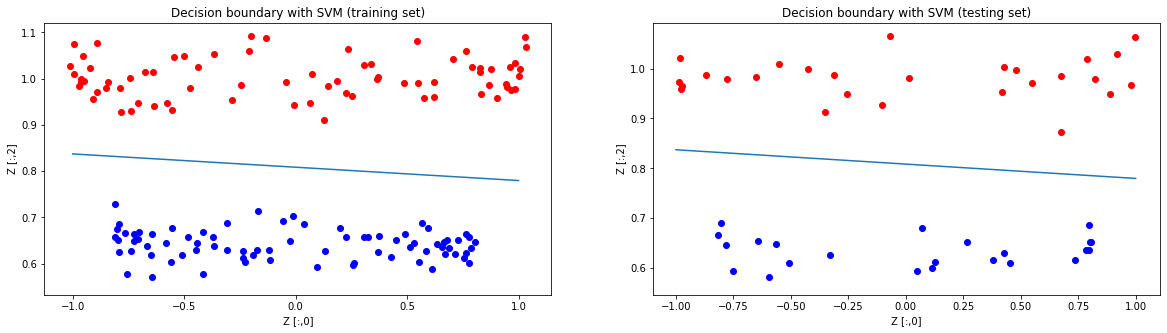

In [14]:
# split the data into training and testing sets.
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, random_state=0)
M,N = Z_train.shape
# Train an instance of our support vector machine class.
w1, b1, lambd1, Z_sv1, y_sv1 = SVM (Z_train,y_train)

# Give a straigt line to separate data
y1 = f_sv_nonlinear (-1,w1,b1)
y2 = f_sv_nonlinear (1,w1,b1)

#Plot the decision boundary.
z1_train = Z_train[y_train==1,:] 
z2_train = Z_train[y_train==-1,:]
z1_test = Z_test[y_test==1,:] 
z2_test = Z_test[y_test==-1,:]
#X-axis is Z [:,0], Y-axis is Z [:,2]
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Decision boundary with SVM (training set)')
plt.scatter(z1_train[:,0],z1_train[:,2],color='blue')
plt.scatter(z2_train[:,0],z2_train[:,2],color='red') 
plt.plot ([-1,1],[y1,y2])
plt.xlabel('Z [:,0]')
plt.ylabel('Z [:,2]')

plt.subplot(1,2,2)
plt.title('Decision boundary with SVM (testing set)')
plt.scatter(z1_test[:,0],z1_test[:,2],color='blue')
plt.scatter(z2_test[:,0],z2_test[:,2],color='red') 
plt.plot ([-1,1],[y1,y2])
plt.xlabel('Z [:,0]')
plt.ylabel('Z [:,2]')

We need to pay attention that the hyperplane now is a plane (not a line), and the line we see in the figure is the projection of the hyperplane on the plane that we projected the data.

Now we return to the initial plane, where the data is not linear separable. We now have the parameters to plot the decision boundary.

Text(0, 0.5, 'X [:,1]')

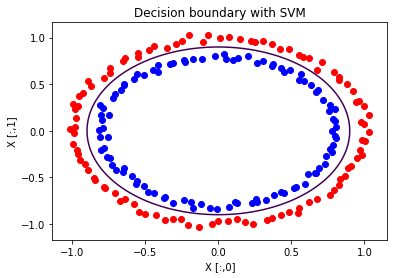

In [15]:
#Generate the decision boundary who respects the transformation of Z=X[:,0]^2+X[:,1]^2
xs = np.linspace(-1.0, 1.0, 100)
ys = np.linspace(-1.0, 1.0, 100)
Xs, Ys = np.meshgrid(xs,ys)
F = (w1[2]*(Xs**2 + Ys**2) +b1 ) # this is the function of the boundary in the original plane (F = 0)

#Plot the decision boundary.
#X-axis is X [:,0], Y-axis is X [:,1]
plt.figure
plt.title('Decision boundary with SVM')
plt.contour(xs,ys,F,[0])
plt.scatter(x1[:,0],x1[:,1],color='blue')
plt.scatter(x2[:,0],x2[:,1],color='red')
plt.xlabel('X [:,0]')
plt.ylabel('X [:,1]') 

# <span style="color:#00B8DE"> 5. Kernel-Trick</span>

In many cases, we do not know the transformation function $\Phi$ or it is too difficult to find $\Phi$. Therefore we need other ways to transform the dimenstion to solve the problem of non-linear separation.

We realize that for the transformed function:

The Lagrangian to minimize: $ L = \frac{1}{2} \sum\limits_{m' =1}^M \sum\limits_{m =1}^M \lambda_{m'}\lambda_{n} y_{m'} y_{m}\underbrace{<Z_{m'} Z_{m}>}  - \sum_{m=1}^M \lambda_m $

The hyperplane:  $ f = \sum_{m = 1}^M \lambda_m y_m \underbrace{Z_m Z} + b^*$

The bias: $b^* = y_k -  \sum_{m = 1}^M \lambda_m y_m \underbrace{Z_m Z_k}$ for any $k \in   $ support vectors

Through this observation, we come the the definition of <b> Kernel </b>:

$$ \begin{align} K(X_n,X_m) = Z_n Z_m \end{align} $$

By defining Kernel, we can transform the data into higher dimension without knowing the transformation function $\Phi$. There are some popular Kernels:

Linear: $K(x,x') = <x,x'>$

Polynomial:  $K(x,x') = (\gamma <x,x'> + \beta )^p$

Gaussian: $K(x,x') = \exp (-\|x-x'\|^2/2\sigma) $

Sigmoid: $K(x,x') = \tanh (\gamma <x,x'> + \beta)$

The definition of kernel gives us some new important parameters, which are gamma, p(degree) and sigma. We will evalute gamma and p in section 6. For sigma, because the sklearn library does not provide the kernel 'gauss', thus we can not evaluate it in this project. 

In sklearn library, we can use some Kernels such as poly, linear or rbf. Let's take an example:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
clf = SVC(kernel = 'poly',degree = 2)
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 1.00 out of 1
Accuracy of our SVM model on the test data is 1.00 out of 1


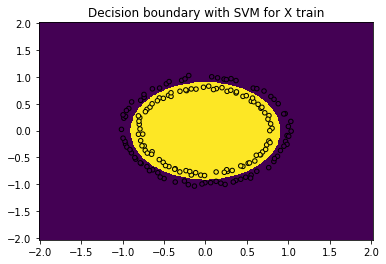

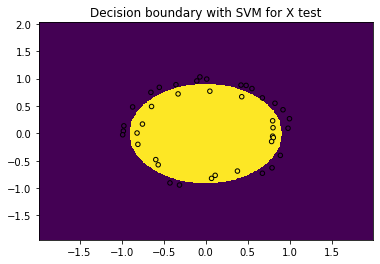

In [17]:
plot_boundaries(clf,x_train,y_train,'Decision boundary with SVM for X train')
plot_boundaries(clf,x_test,y_test,'Decision boundary with SVM for X test')

We got the same results as calculated above

# <span style="color:#00B8DE"> 6. Influence of parameters</span>

In this sections we will evaluate the influence of the main kinds of parameters in SVM: kernel, C, gamma and degree (for poly kernel only) using the sklearn library and iris datasets provided by sklearn.

#### a) Kernel

We test with 3 kinds of kernels to see their influence on the classification, C and gamma stay the same.

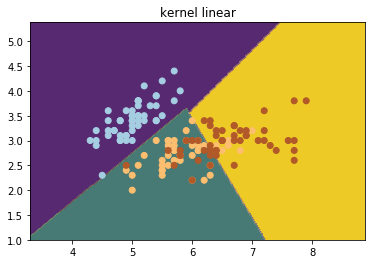

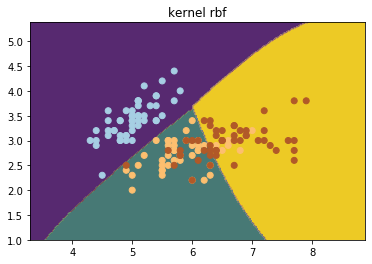

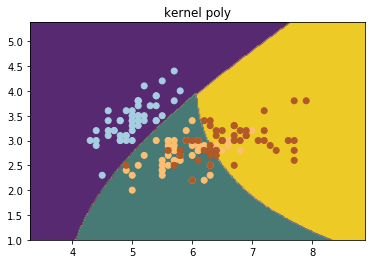

In [18]:
from sklearn import datasets

def plotSVC_Influence(title,h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[x0.ravel(), x1.ravel()])
    Z = Z.reshape(x0.shape)
    plt.pcolormesh(x0, x1, Z)
    plt.contourf(x0, x1, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(x0.min(), x0.max())
    plt.title(title)
    plt.show()
#Get data and labels
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc =SVC(kernel=kernel).fit(X, y)
    plotSVC_Influence('kernel ' + str(kernel))



For different kernels, the shapes of the boundaries are different

#### b) C

We test with 5 values of C to see their influence on the classification, we use kernel poly (degree = 3) and gamma = 1 (defaut).

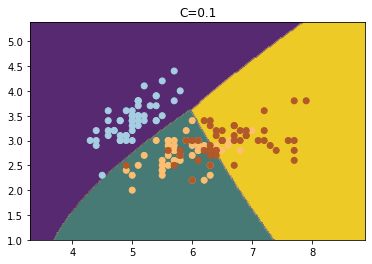

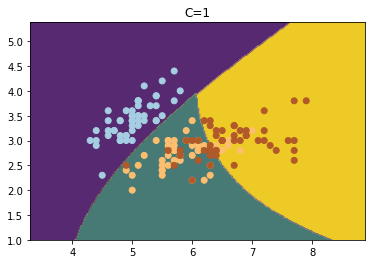

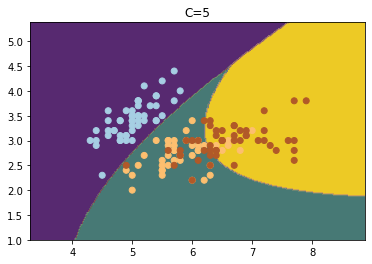

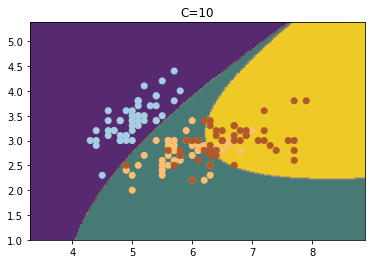

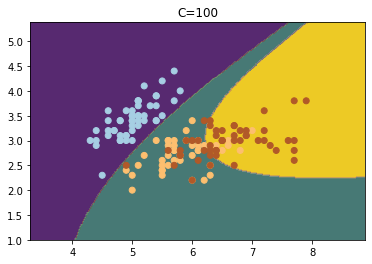

In [19]:
ct = [0.1, 1, 5, 10, 100]
for c in ct:
    svc = SVC(kernel='poly', C=c).fit(X, y)
    plotSVC_Influence('C=' + str(c))

The parameter C represents for the trade-off between accepting errors for smooth decision boundary and training correctly using a complex model. The bigger C is, the more complex model is. Increasing C to a very large value may lead us to overfitting problem.

#### c) Gamma

We test with 5 values of gamma to see their influence on the classification, we use kernel poly (degree = 3) and C = 1 (defaut).

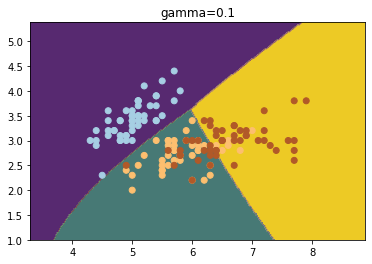

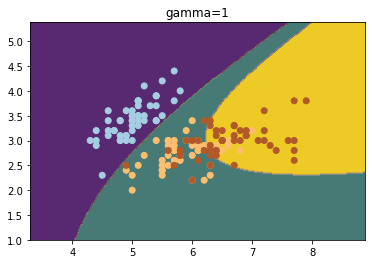

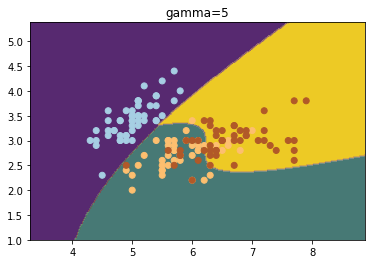

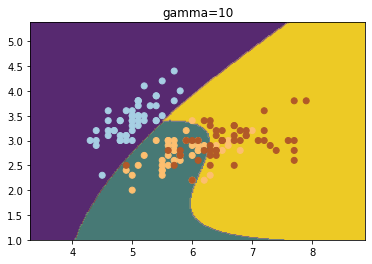

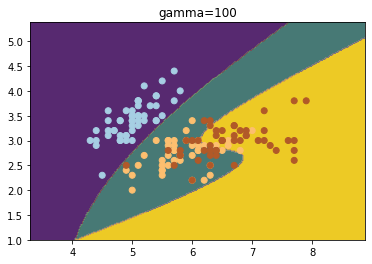

In [20]:
gamma = [0.1, 1, 5, 10, 100]
for g in gamma:
    svc = SVC(kernel='poly', gamma = g).fit(X, y)
    plotSVC_Influence('gamma=' + str(g))

The higher gamma value, the more fitting the model has. However, increasing the gamma value may lead to overfitting problem.

#### d) Degree

This parameter is only considered for the polyminal kernel because it is the order of a polyminal. We evaluate by using 4 values of degree.

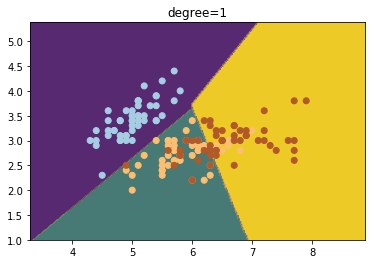

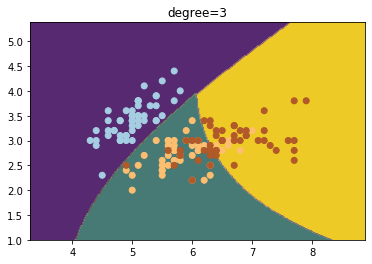

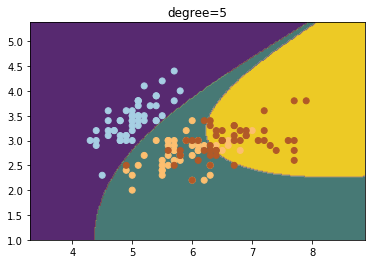

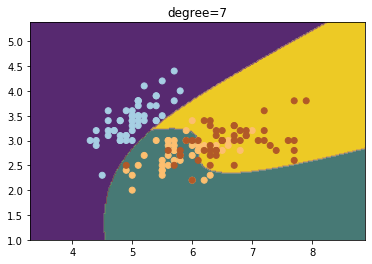

In [21]:
degree = [1, 3, 5, 7]
for d in degree:
    svc = SVC(kernel='poly', degree = d).fit(X, y)
    plotSVC_Influence('degree=' + str(d))

We observed that degree = 1 has the same result with linear kernel. It can be explain if we look at the definition of the polyminal kernel in part 5. Higher degree requires more time to compute and may lead to overfitting.

# <span style="color:#00B8DE"> 7. Pyrat Datasets</span>

In this section, I will use the SVM algorithm to predict the winner or a draw match. I set the parameters: maze size 5x5, pieces of cheese 4. The number of dataset is 2000 games.

For prediction, the inputs of the model are the map with cheese's positions. And the out put is one of 3 values -1,0,1 coressponding to Python win, Draw and Rat win respectively. 

#### a) Implement SVM model for 3 classes: Python win, Rat win and Draw.

In [22]:
# We load the data in two file x.npz and y.npz
filename = "x.npz"

loaded_npz = np.load(filename)
x_pyrat = loaded_npz["data"]

filename = "y.npz"
loaded_npz = np.load(filename)
y_pyrat = loaded_npz["data"]
print ('The shape of x is: ', x_pyrat.shape)
print ('The shape of y is: ', y_pyrat.shape)

The shape of x is:  (2000, 25)
The shape of y is:  (2000,)


The input x_pyrat has the the size of (2000,25): 2000 means the number of games and 25 means the size of maze, which is reshaped from (5,5) to (1,25). x_pyrat contains 2 values (0,1): 0 means the space and 1 means the cheese.

We now calculate the number of games in each class.

In [23]:
python = 0
rat = 0
draw  = 0
for i in range (len(y_pyrat)):
    if y_pyrat[i] == 1:
        python +=1
    elif y_pyrat[i] == -1:
        rat +=1
    else: draw +=1
print ('The number of games Python wins: ',python)
print ('The number of games Draw: ',draw)
print ('The number of games Rat wins: ',rat)

The number of games Python wins:  555
The number of games Draw:  876
The number of games Rat wins:  569


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_pyrat, y_pyrat, test_size = 0.2, random_state=0)
clf = SVC(C=1.5,kernel = 'rbf', gamma=0.5)
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 0.98 out of 1
Accuracy of our SVM model on the test data is 0.80 out of 1


Test Set:
              precision    recall  f1-score   support

        -1.0       0.86      0.77      0.82       115
         0.0       0.74      0.85      0.79       183
         1.0       0.85      0.73      0.78       102

    accuracy                           0.80       400
   macro avg       0.82      0.78      0.80       400
weighted avg       0.81      0.80      0.80       400

[[ 89  26   0]
 [ 14 156  13]
 [  0  28  74]]


Text(0, 0.5, 'Predicted class')

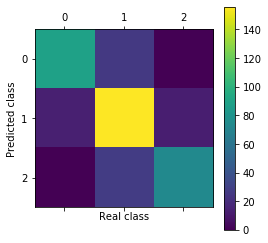

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_test = clf.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

We can see that the training accuracy is quite high while the testing accuracy is lower. It seems that the model has been trained very well due to the small size of maze, which means the amount of information is not too large. However, due to the unbalanced of the dataset and the ambiguous relationship between the map (x) and label (y) (which means that the similar features of objects in the same class are not clear or hard to identify), the test accuracy is only 80%, which is smaller than the train accuracy. 

#### b) Binary classification between Pyrat and Python wins

To implement a binary classification, I remove the draw class.

In [26]:
filename = "x.npz"

loaded_npz = np.load(filename)
x_pyrat = loaded_npz["data"]

filename = "y.npz"
loaded_npz = np.load(filename)
y_pyrat = loaded_npz["data"]

i = np.argwhere (y_pyrat == 0)
x_pyrat = np.delete(x_pyrat,i,0)
y_pyrat = np.delete(y_pyrat,i,0)

Now we create an implement a SVM model using sklearn library

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_pyrat, y_pyrat, test_size = 0.2, random_state=0)
clf = SVC(C=1.5,kernel = 'rbf', gamma=1)
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 1.00 out of 1
Accuracy of our SVM model on the test data is 0.98 out of 1


Test Set:
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.98       122
         1.0       0.99      0.97      0.98       103

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225

[[121   1]
 [  3 100]]


Text(0, 0.5, 'Predicted class')

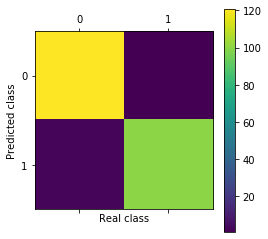

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_test = clf.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Due to the small size of maze and pieces of cheese, the model acheives a high accuracy in both training and testing. Moreover, there are only 2 classes with almost the same number of games, thus the complexity and ambiguity is reduced. These reasons lead to a higher accuracy comparing with the 3 classes.

#### c) Improve 3 classes classification accuracy

In order to improve the accuracy for classifying 3 classes, we need a balanced data set of 3 classes. We now calculate the number of games in each class.

As calculate in part a, the number of game in draw class overwhelms the other 2 classes. Therefore I will delete some number of games in draw class to make 3 classes balanced. 

In [29]:
filename = "x.npz"

loaded_npz = np.load(filename)
x_pyrat = loaded_npz["data"]

filename = "y.npz"
loaded_npz = np.load(filename)
y_pyrat = loaded_npz["data"]

i = np.argwhere (y_pyrat == 0) #identify the positions of draw games.
j = i[1:307] # selecte the first 307 draw games
x_pyrat = np.delete(x_pyrat,j,0)
y_pyrat = np.delete(y_pyrat,j,0)

python = 0
rat = 0
draw  = 0
for i in range (len(y_pyrat)):
    if y_pyrat[i] == 1:
        python +=1
    elif y_pyrat[i] == -1:
        rat +=1
    else: draw +=1
print ('The number of games Python wins: ',python)
print ('The number of games Draw: ',draw)
print ('The number of games Rat wins: ',rat)


The number of games Python wins:  555
The number of games Draw:  570
The number of games Rat wins:  569


The number of games in 3 classes now almost balanced. Now we train and test the SVM model.


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_pyrat, y_pyrat, test_size = 0.2, random_state=0)
clf = SVC(C=1,kernel = 'rbf', gamma=0.5)
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 0.97 out of 1
Accuracy of our SVM model on the test data is 0.82 out of 1


Compare to part a, the performance of the model is increased about 2%. It shows the benifits of having a balanced data set. The increased amount is small because at the begining, the number of games between python win and rat win was already almost equal and we only modify the draw class. 

#### d) Change the maze's size and pieces of cheese.

Finally, I will try a different set of parameters like maze'size and pieces of cheese to obtain their influence on the model's performance.

I use the defaut setting of pyrat: maze size 21x15, pieces of cheese 40. The number of games is 1000.


In [31]:
filename = "x_15.npz"

loaded_npz = np.load(filename)
x_pyrat = loaded_npz["data"]

filename = "y_15.npz"
loaded_npz = np.load(filename)
y_pyrat = loaded_npz["data"]

python = 0
rat = 0
draw  = 0
for i in range (len(y_pyrat)):
    if y_pyrat[i] == 1:
        python +=1
    elif y_pyrat[i] == -1:
        rat +=1
    else: draw +=1
print ('The number of games Python wins: ',python)
print ('The number of games Draw: ',draw)
print ('The number of games Rat wins: ',rat)

The number of games Python wins:  420
The number of games Draw:  136
The number of games Rat wins:  444


We can see that when we increase the size of maze and the pieces of cheese, there are fewer draw games.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_pyrat, y_pyrat, test_size = 0.2, random_state=0)
clf = SVC(C=1.5,kernel = 'rbf', gamma=0.01)
clf.fit(x_train,y_train)
print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(clf.score(x_train, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(clf.score(x_test, y_test)))

Accuracy of our SVM model on the training data is 0.78 out of 1
Accuracy of our SVM model on the test data is 0.55 out of 1


It is obvious that increasing the maze size and pieces of cheese will lead to the decrease in performance. Due the amount of information that needs to be processed increases and the unbalance dataset, there is a huge gap between the model's performance in part a and here. Moreover,if we use the model in part a (with gamma = 0.5), we will get overfitting problem because the dataset now is more complex, thus it is very difficult to give a good prediction. Therefore we need to reduce gamma to avoid that problem.

To acheive a better result, we need a larger dataset, which means more cases of games will be taken into account. With the maze of 21x15, the number of games should be 10 000 or more because there are variety of situations will happen in a large map like this.

# <span style="color:#00B8DE"> 8. References</span>

1. Savan Patel, Chapter 2 : SVM (Support Vector Machine) — Theory, Available at: https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
2. Martin Thoma, Using SVMs with sklearn, Available at:https://martin-thoma.com/svm-with-sklearn/
3. Madhu Sanjeevi, Chapter 3.1 : SVM from Scratch in Python, Available at:https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc



